In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [12]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_set.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ROS.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_RUS.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_SMOTE.csv')
df_cnn=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_cnn.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_set.csv')
df_validation=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\validation_set.csv')
x_val=df_validation.iloc[:,:-1]
y_val=df_validation.iloc[:,-1]
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_cnn=df_cnn.iloc[:,:-1]
y_cnn=df_cnn.iloc[:,-1]

In [3]:
clf =tree.DecisionTreeClassifier()
ada = AdaBoostClassifier()
rfc =ensemble.RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [8]:
from sklearn import metrics

sampling_methods =['No Sampling','Over Sampling','Under Sampling', 'SMOTE Sampling','CNN Sampling']
sampling_methods1x =[x_train,x_ov,x_under,x_smote,x_cnn]
sampling_methods1y=[y_train,y_ov, y_under, y_smote, y_cnn]
ml_methods=[clf,rfc,ada,gbc]
label=['dec tree','rfc','ada','gradboost']
dict1 ={'precision': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]},'recall': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}, 'f1':{'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]},'accuracy': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}}
for j in range(len(ml_methods)):
    ml =ml_methods[j]
    label[j]
    print(ml)
    for i in range(len(sampling_methods)):
        #print(sampling_methods[i])
        fit=ml.fit(sampling_methods1x[i],sampling_methods1y[i])
        y_pred =fit.predict(x_test)
        precision,recall,f1,none =precision_recall_fscore_support(y_pred,y_test,average='weighted')
        accuracy =accuracy_score(y_pred,y_test)
        dict1['precision'][sampling_methods[i]].append(precision)
        dict1['recall'][sampling_methods[i]].append(recall)
        dict1['f1'][sampling_methods[i]].append(f1)
        dict1['accuracy'][sampling_methods[i]].append(accuracy)
print(dict1)

DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
{'precision': {'No Sampling': [0.7217284616138228, 0.8691805293705809, 0.889237036346736, 0.8788672740784282], 'Over Sampling': [0.7229885359592383, 0.8350427999882118, 0.7336534503234192, 0.737766554758258], 'Under Sampling': [0.627821474785562, 0.724210554117871, 0.7237987369085084, 0.7318615228623702], 'SMOTE Sampling': [0.6858803785929171, 0.8078641869993493, 0.7452449784188018, 0.8044826127785862], 'CNN Sampling': [0.602769969040001, 0.7638999008356093, 0.793477452247766, 0.7963014998912775]}, 'recall': {'No Sampling': [0.7293333333333333, 0.8193333333333334, 0.8186666666666667, 0.8246666666666667], 'Over Sampling': [0.7277777777777777, 0.8088888888888889, 0.7455555555555555, 0.7495555555555555], 'Under Sampling': [0.6162222222222222, 0.7337777777777778, 0.7353333333333333, 0.7431111111111111], 'SMOTE Sampling': [0.7046666666666667, 0.7988888888888889, 0.7582222222222222, 0.79622222

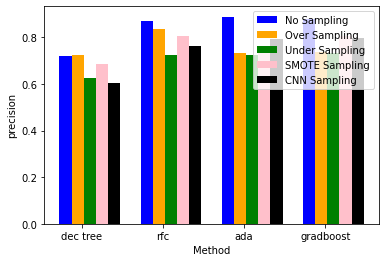

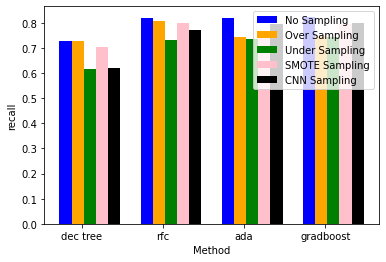

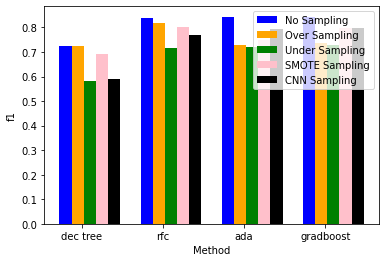

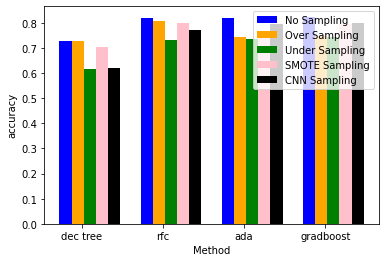

In [9]:
evaluation_metric= ['precision','recall','f1','accuracy']
x=np.arange(4)
width=0.15
for n in evaluation_metric:
    plt.bar(x-0.2, dict1[n]['No Sampling'], width,color='blue')
    plt.bar(x-0.05, dict1[n]['Over Sampling'], width,color ='orange')
    plt.bar(x+0.1, dict1[n]['Under Sampling'],width,color='green')
    plt.bar(x+0.25, dict1[n]['SMOTE Sampling'], width,color='pink')
    plt.bar(x+0.4, dict1[n]['CNN Sampling'], width,color='black')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel(n)
    plt.xlabel('Method')
    plt.xticks(x,label)
    plt.legend(sampling_methods)
    plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
#decision tree optimise parameters _param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=clf,param_grid=parameters,scoring = 'f1',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_val,y_val)

In [56]:
best_f1_dt = grid_search_dt.best_score_
print('f1 on Cross Validation set :',best_f1_dt)
best_parameters_1 = grid_search_dt.best_params_
best_parameters_1

f1 on Cross Validation set : 0.4446251060977069


{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [57]:
y_pred_dct_tuned = grid_search_dt.predict(x_test)
precision,recall,f1,none =precision_recall_fscore_support(y_pred_dct_tuned,y_test,average='weighted')
accuracy =accuracy_score(y_pred_dct_tuned,y_test)

In [58]:
model_results =  pd.DataFrame([['Decision Tree Tuned', accuracy,precision,recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821111,0.886465,0.821111,0.844283


In [59]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='f1',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(x_val,y_val)

In [60]:
best_f1_rf = grid_search_rf.best_score_
print('f1 on Cross Validation set :',best_f1_rf)
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

f1 on Cross Validation set : 0.46115749714100324


{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 600}

In [61]:
y_pred_rfc_tuned = grid_search_rf.predict(x_test)

In [62]:
precision,recall,f1,none =precision_recall_fscore_support(y_pred_rfc_tuned,y_test,average='weighted')
accuracy =accuracy_score(y_pred_rfc_tuned,y_test)
model=  pd.DataFrame([['Random Forest Tuned', accuracy,precision,recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Tuned,0.812667,0.862026,0.812667,0.830989


In [63]:
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821111,0.886465,0.821111,0.844283
1,Random Forest Tuned,0.812667,0.862026,0.812667,0.830989


In [64]:
param_grid_ada = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'n_estimators': [50,60,70,80,90,100,150, 200]}
grid_search_ada = GridSearchCV(estimator=ada,param_grid=param_grid_ada,scoring='f1',cv=5,n_jobs=-1)
grid_search_ada = grid_search_rf.fit(x_val,y_val)

In [65]:
best_f1_ada = grid_search_ada.best_score_
print('f1 on Cross Validation set :',best_f1_ada)
best_parameters_3 = grid_search_ada.best_params_
best_parameters_3
y_pred_ada_tuned = grid_search_ada.predict(x_test)
precision,recall,f1,none =precision_recall_fscore_support(y_pred_ada_tuned,y_test,average='weighted')
accuracy =accuracy_score(y_pred_ada_tuned,y_test)
model=  pd.DataFrame([['AdaBoost', accuracy,precision,recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

f1 on Cross Validation set : 0.4651146028558866


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoost,0.810889,0.858698,0.810889,0.82877


In [66]:
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821111,0.886465,0.821111,0.844283
1,Random Forest Tuned,0.812667,0.862026,0.812667,0.830989
2,AdaBoost,0.810889,0.858698,0.810889,0.828770


In [67]:
param_grid_gbc = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                  'n_estimators': [50,60,70,80,90,100,150, 200],
                  'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
grid_search_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid_gbc,scoring='f1',cv=5,n_jobs=-1)
grid_search_gbc = grid_search_rf.fit(x_val,y_val)

In [68]:
best_f1_gbc = grid_search_gbc.best_score_
print('f1 on Cross Validation set :',best_f1_gbc)
best_parameters_4 = grid_search_gbc.best_params_
best_parameters_4
y_pred_gbc_tuned = grid_search_gbc.predict(x_test)
precision,recall,f1,none =precision_recall_fscore_support(y_pred_gbc_tuned,y_test,average='weighted')
accuracy =accuracy_score(y_pred_gbc_tuned,y_test)
model=  pd.DataFrame([['Gradient Boosted Decision Tree', accuracy,precision,recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

f1 on Cross Validation set : 0.46162452366760187


,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosted Decision Tree,0.811778,0.858396,0.811778,0.829211


In [69]:
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.821111,0.886465,0.821111,0.844283
1,Random Forest Tuned,0.812667,0.862026,0.812667,0.830989
2,AdaBoost,0.810889,0.858698,0.810889,0.828770
3,Gradient Boosted Decision Tree,0.811778,0.858396,0.811778,0.829211


In [ ]:
#now i just need to plot ROC Curves and plot new scores on 